# Sweep BookCrossing Data

## Setup

In [1]:
library(readr)
library(dplyr)
library(reshape2)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
options(repr.matrix.max.rows=15, repr.plot.height=4.5)

### Bias

In [3]:
bias.results = read_csv("build/az-bias-sweep-results.csv")

Parsed with column specification:
cols(
  DataSet = col_character(),
  Algorithm = col_character(),
  Damping = col_integer(),
  Succeeded = col_character(),
  BuildTime = col_double(),
  TestTime = col_double(),
  RMSE.ByUser = col_double(),
  RMSE.ByRating = col_double(),
  Predict.nDCG = col_double()
)


In [4]:
bias.results.tall = bias.results %>%
    select(Damping, RMSE.ByUser, Predict.nDCG) %>%
    melt(id.vars = "Damping", variable.name = "Metric")
head(bias.results.tall)

Damping,Metric,value
99,RMSE.ByUser,0.9188972
72,RMSE.ByUser,0.9091177
71,RMSE.ByUser,0.9086724
70,RMSE.ByUser,0.9082195
69,RMSE.ByUser,0.9077589
68,RMSE.ByUser,0.9072903


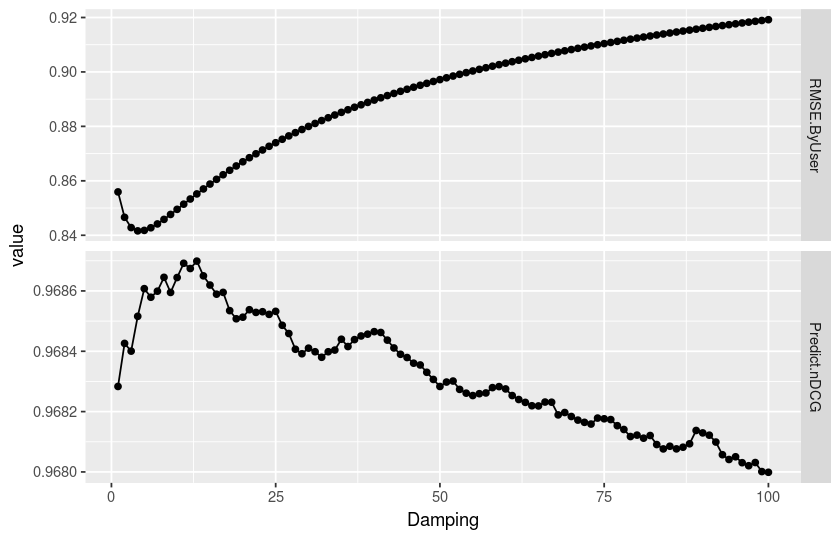

In [5]:
ggplot(bias.results.tall) +
    aes(x=Damping, y=value) +
    geom_point() + geom_line() +
    facet_grid(Metric ~ ., scales="free_y")

Bias damping of **7** looks good. 5 wouldn't be bad either.

We will feed this value foward into the other sweeps.

## Explicit Feedback Recsys

### FunkSVD

In [3]:
funksvd.explicit = read_csv('./build/funksvd/az-ratings-sweep-results.csv')

Parsed with column specification:
cols(
  DataSet = col_character(),
  Algorithm = col_character(),
  FeatureCount = col_integer(),
  Succeeded = col_character(),
  BuildTime = col_double(),
  TestTime = col_double(),
  RMSE.ByUser = col_double(),
  RMSE.ByRating = col_double(),
  Predict.nDCG = col_double(),
  nDCG = col_double(),
  MAP = col_double()
)


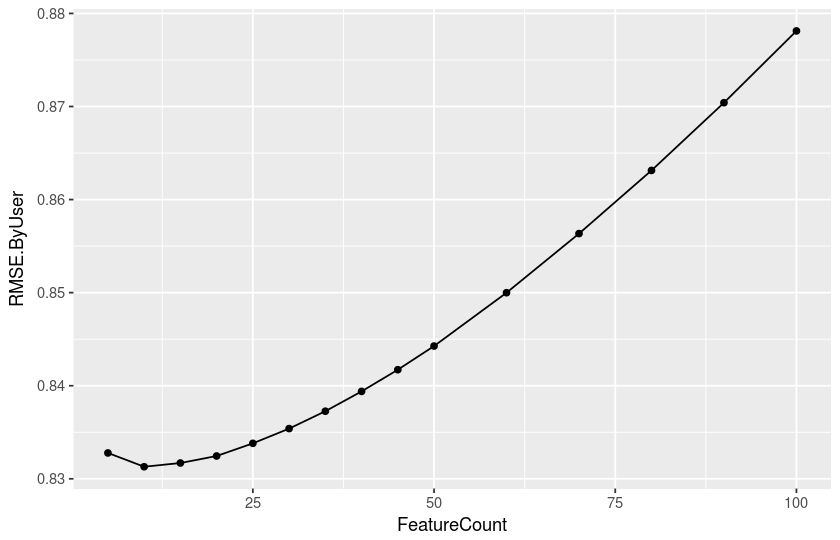

In [4]:
ggplot(funksvd.explicit) +
    aes(x=FeatureCount, y=RMSE.ByUser) +
    geom_point() + geom_line()

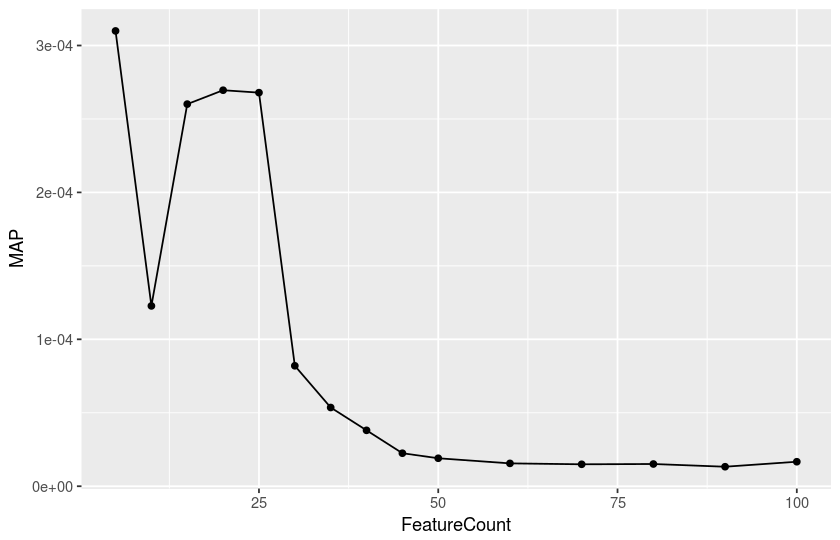

In [5]:
ggplot(funksvd.explicit) +
    aes(x=FeatureCount, y=MAP) +
    geom_point() + geom_line()

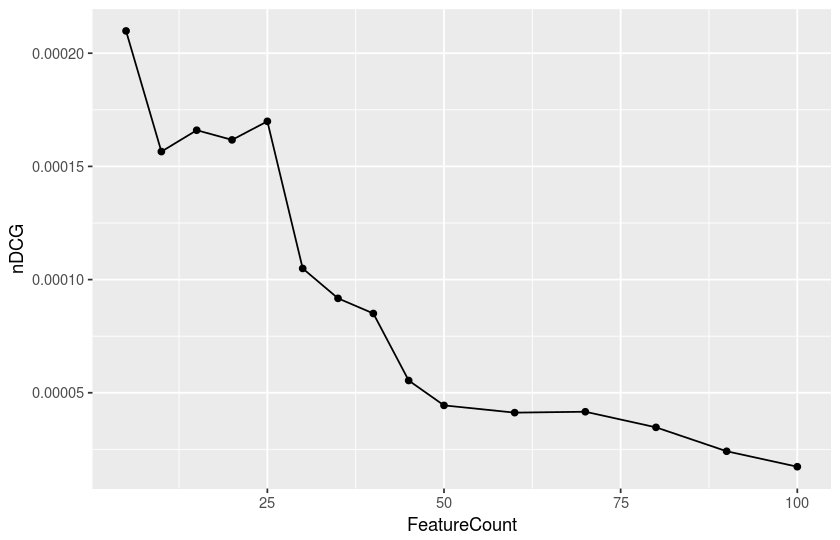

In [6]:
ggplot(funksvd.explicit) +
    aes(x=FeatureCount, y=nDCG) +
    geom_point() + geom_line()

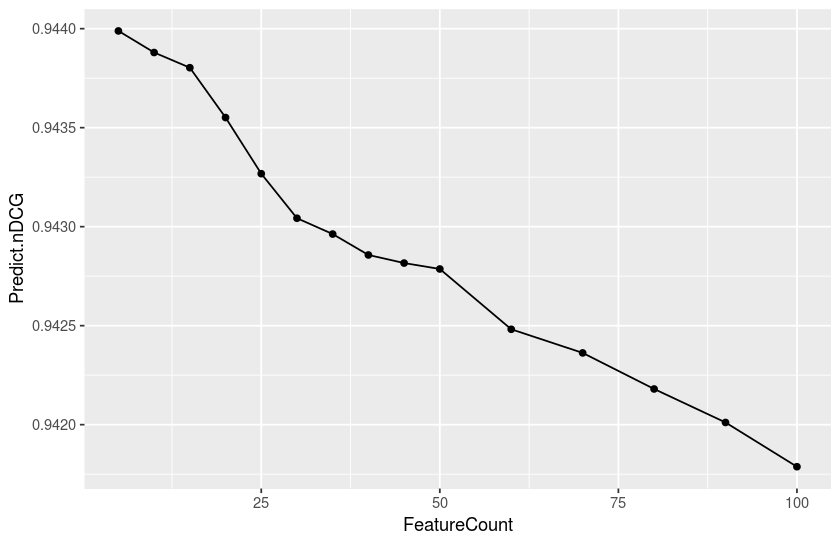

In [7]:
ggplot(funksvd.explicit) +
    aes(x=FeatureCount, y=Predict.nDCG) +
    geom_point() + geom_line()

#### Results

Let's use **25** features.

### PF

In [3]:
pf.explicit = purrr::map_df(1:5, function(part){
    results.fn = sprintf('build/pf/az-ratings-sweep-results-0%d.csv', part)
    suppressMessages(read_csv(results.fn))
})

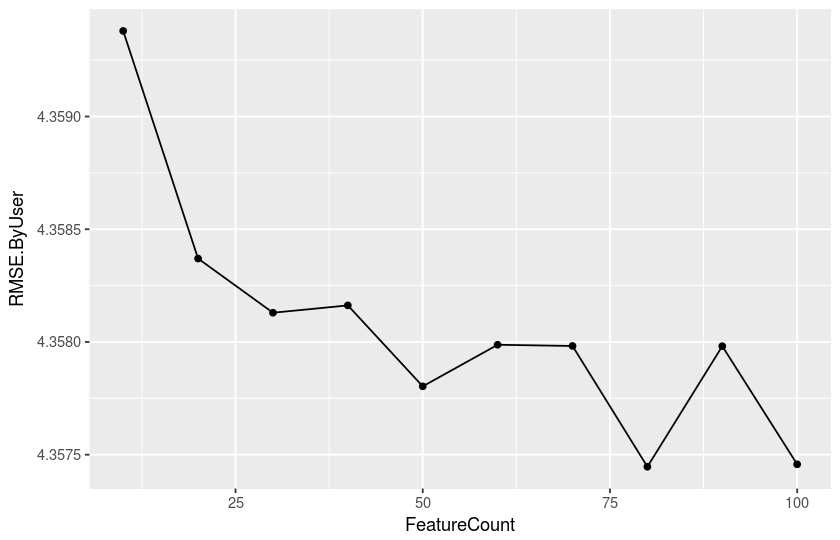

In [4]:
ggplot(pf.explicit) +
    aes(x=FeatureCount, y=RMSE.ByUser) +
    geom_point() + geom_line()

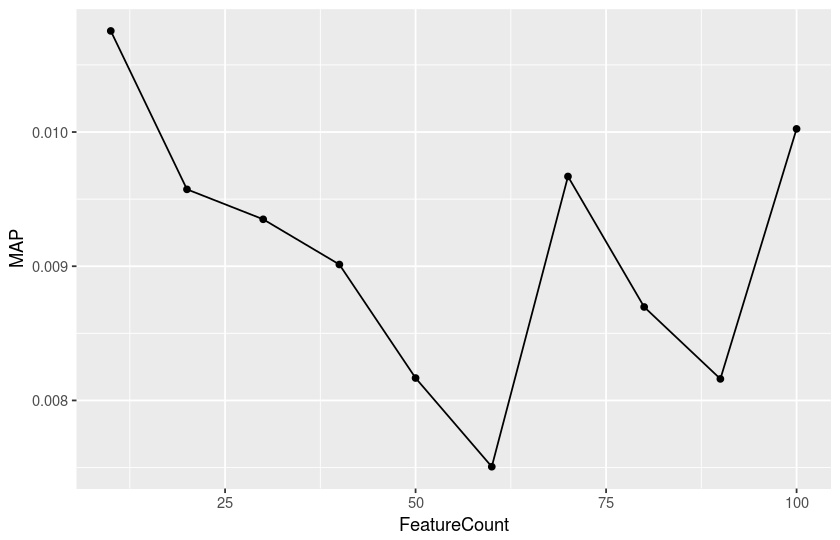

In [5]:
ggplot(pf.explicit) +
    aes(x=FeatureCount, y=MAP) +
    geom_point() + geom_line()

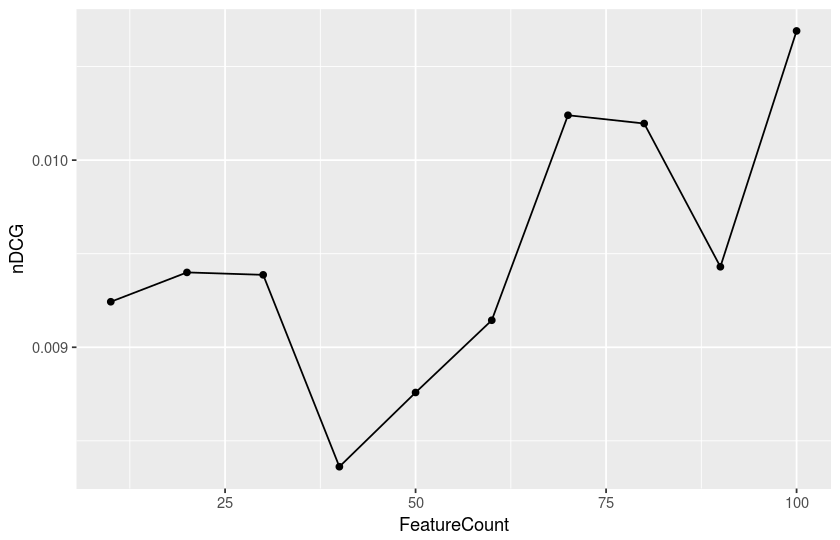

In [6]:
ggplot(pf.explicit) +
    aes(x=FeatureCount, y=nDCG) +
    geom_point() + geom_line()

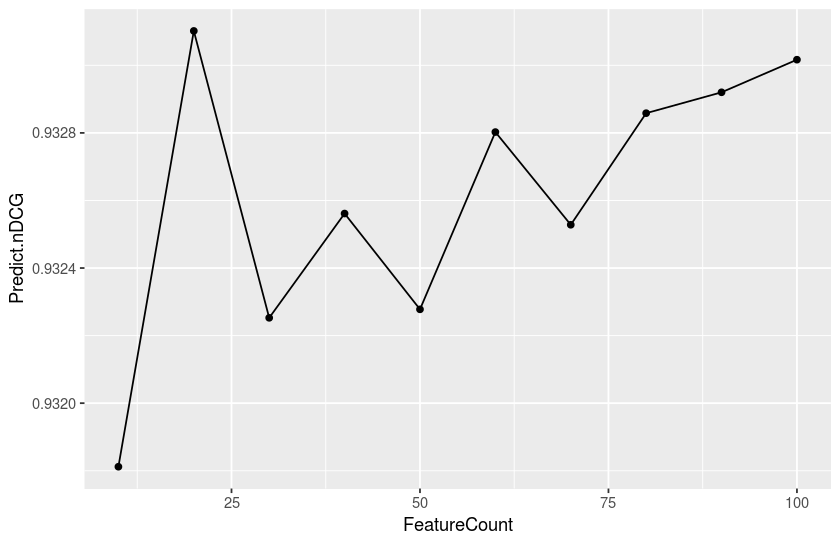

In [7]:
ggplot(pf.explicit) +
    aes(x=FeatureCount, y=Predict.nDCG) +
    geom_point() + geom_line()

## Implicit Feedback Recsys

### FunkSVD

In [4]:
popular.implicit = read_csv('./build/popular-im/az-implicit-sweep-results.csv')
funksvd.implicit = read_csv('./build/funksvd-im/az-implicit-sweep-results.csv')

Parsed with column specification:
cols(
  DataSet = col_character(),
  Algorithm = col_character(),
  Succeeded = col_character(),
  BuildTime = col_double(),
  TestTime = col_double(),
  nDCG = col_double(),
  MAP = col_double()
)
Parsed with column specification:
cols(
  DataSet = col_character(),
  Algorithm = col_character(),
  FeatureCount = col_integer(),
  Succeeded = col_character(),
  BuildTime = col_double(),
  TestTime = col_double(),
  nDCG = col_double(),
  MAP = col_double()
)


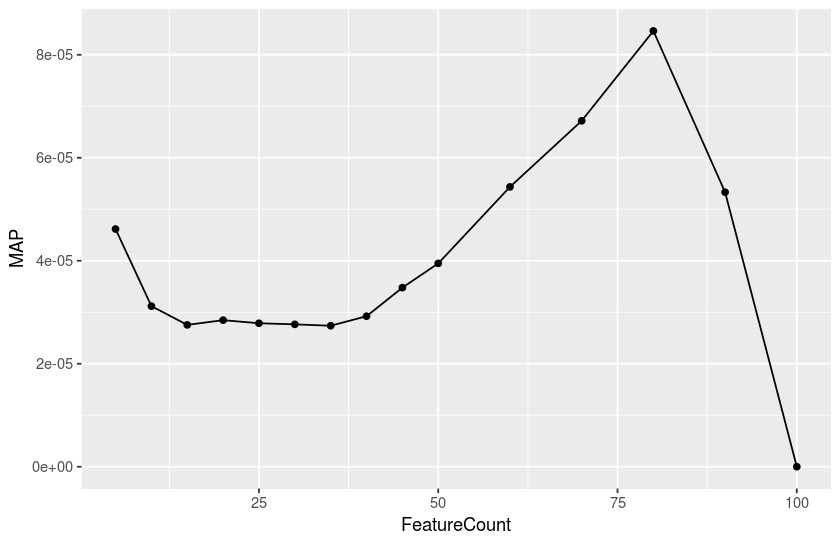

In [11]:
ggplot(funksvd.implicit) +
    aes(x=FeatureCount, y=MAP) +
    geom_point() + geom_line()

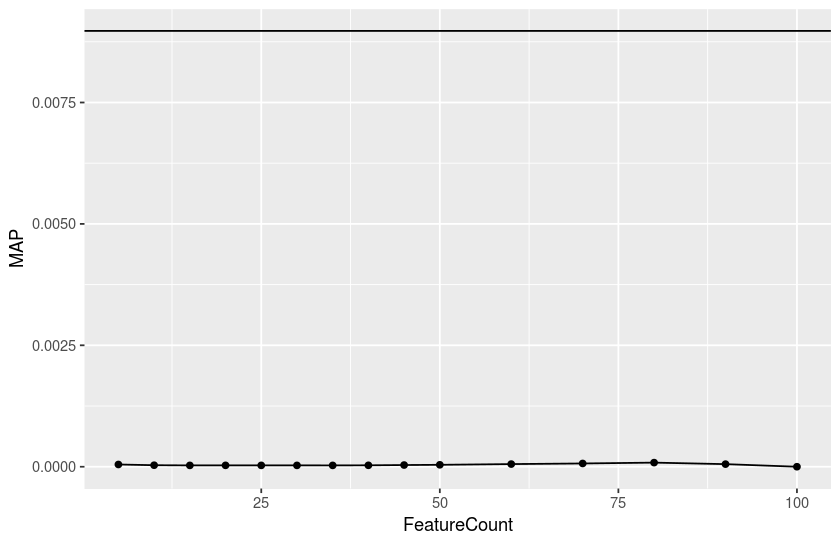

In [10]:
ggplot(funksvd.implicit) +
    aes(x=FeatureCount, y=MAP) +
    geom_point() + geom_line() +
    geom_hline(data=filter(popular.implicit), mapping=aes(yintercept=MAP))

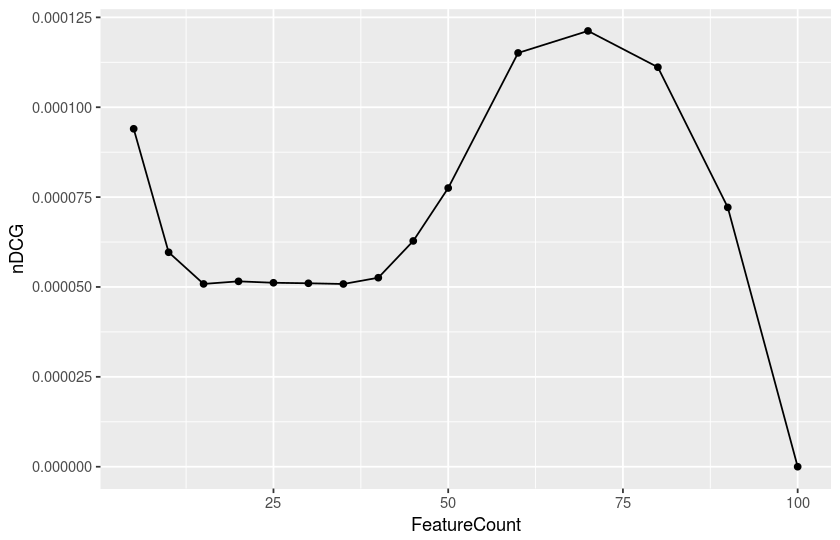

In [5]:
ggplot(funksvd.implicit) +
    aes(x=FeatureCount, y=nDCG) +
    geom_point() + geom_line()

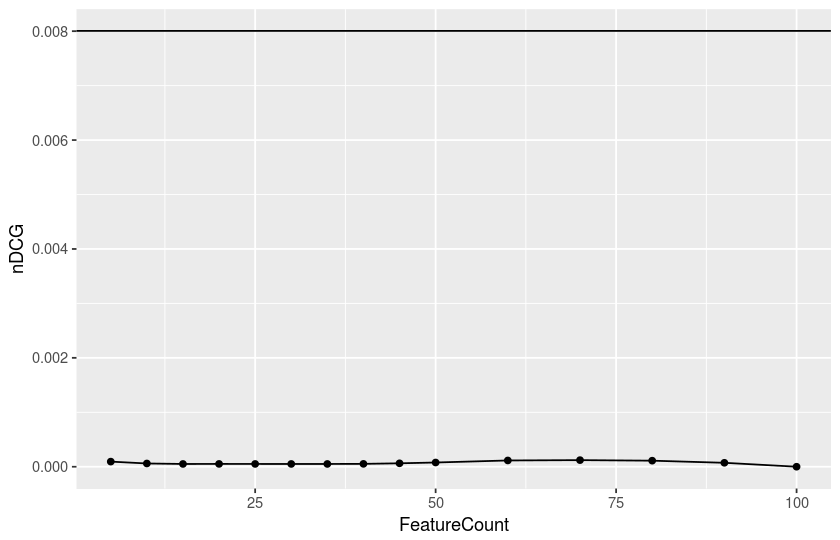

In [11]:
ggplot(funksvd.implicit) +
    aes(x=FeatureCount, y=nDCG) +
    geom_point() + geom_line() +
    geom_hline(data=filter(popular.implicit), mapping=aes(yintercept=nDCG))

### PF

In [12]:
pf.implicit = purrr::map_df(1:5, function(part){
    results.fn = sprintf('build/pf-im/az-implicit-sweep-results-0%d.csv', part)
    suppressMessages(read_csv(results.fn))
})

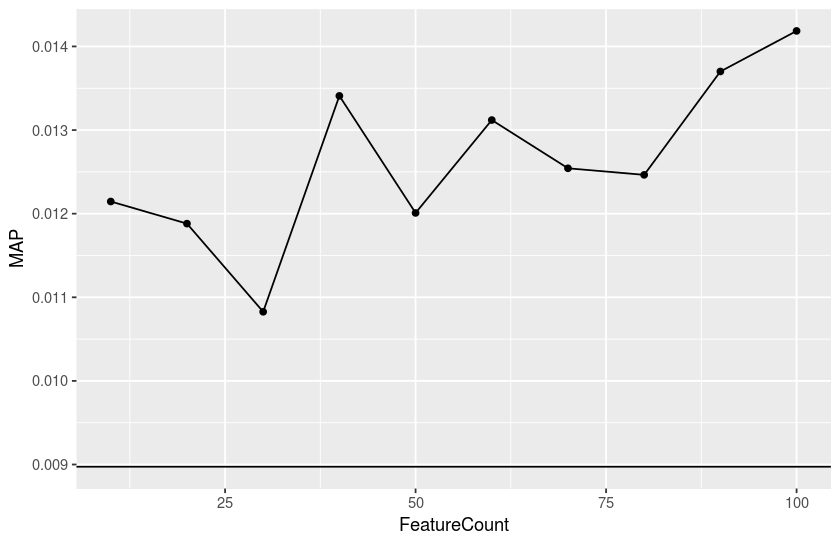

In [14]:
ggplot(pf.implicit) +
    aes(x=FeatureCount, y=MAP) +
    geom_point() + geom_line() +
    geom_hline(data=filter(popular.implicit), mapping=aes(yintercept=MAP))

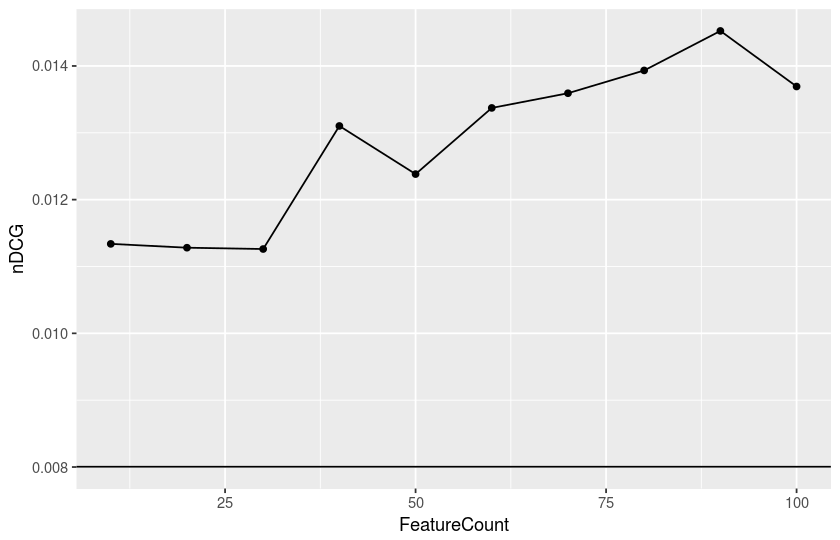

In [15]:
ggplot(pf.implicit) +
    aes(x=FeatureCount, y=nDCG) +
    geom_point() + geom_line() +
    geom_hline(data=filter(popular.implicit), mapping=aes(yintercept=nDCG))